In [1]:
import numpy as np
import pandas as pd
import os
import pdb
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

np.random.seed(97)

In [2]:
m = ["A", "C", "G", "T"]
def id2seq(ids):
    return "".join([m[i] for i in ids])

In [3]:
sequence_analysis_dir = "/global/scratch/users/aniketh/promoter_modelling/jax_data/sequence_analysis_v8_TITAN/"
dataset_sequences = pickle.load(open(os.path.join(sequence_analysis_dir, "dataset_seqs_eval.pkl"), "rb"))

dataset_ensemble_preds = {}
dataset_ensemble_preds["sequence"] = []
for cell in ["THP1", "Jurkat", "K562"]:
    dataset_ensemble_preds["ensemble_mean_" + cell] = []
    dataset_ensemble_preds[cell + "_measured"] = []
    dataset_ensemble_preds["ensemble_std_" + cell] = []

dataset_seqs = [id2seq(i) for i in dataset_sequences["sequences"]]
dataset_ensemble_preds["sequence"] = dataset_seqs

for cell2 in ["THP1", "Jurkat", "K562"]:
    dataset_ensemble_preds["ensemble_mean_" + cell2] = list(dataset_sequences[f"ensemble_sequences_{cell2.lower()}_pred"].mean(axis=0))
    dataset_ensemble_preds[cell2 + "_measured"] = list(dataset_sequences[f"{cell2.lower()}_output"])
    dataset_ensemble_preds["ensemble_std_" + cell2] = list(dataset_sequences[f"ensemble_sequences_{cell2.lower()}_pred"].std(axis=0))
dataset_ensemble_preds = pd.DataFrame(dataset_ensemble_preds)
dataset_ensemble_preds

,sequence,ensemble_mean_THP1,THP1_measured,ensemble_std_THP1,ensemble_mean_Jurkat,Jurkat_measured,ensemble_std_Jurkat,ensemble_mean_K562,K562_measured,ensemble_std_K562
0,GTCTCTGGGCCGGAAGCCCCCTCTCCTCCCCCGCCGCAGCCCCCTC...,1.385821,1.696156,0.230765,2.658725,0.967215,0.297987,2.730969,2.849015,0.327378
1,ACCCGTGGGGAGGCGGTGAACTCCTCCGCAGGGGCCGATGCCCGGG...,-0.045522,-0.607509,0.125966,0.487816,-0.193749,0.126169,0.502264,0.141496,0.114694
2,CGCTACCTCACTCACGGGCGAGAACTAAGCACCTACTGTGGACCCG...,0.055806,0.450230,0.100324,0.798811,0.467215,0.116827,1.065492,0.849015,0.119774
3,AACCTGGGACAACAGCAAAAAAAAAAAAAAAAAAAAAAAGGCCCCA...,0.992081,0.772158,0.305253,1.981933,0.967215,0.459002,2.072672,1.433977,0.490993
4,ACCCGGTGCCGGAGGCCGTGGGCGGCGACATGCAGCAGCTGAACCA...,-0.239843,-0.549770,0.061097,-0.371285,-1.097427,0.128852,-0.337105,-0.943467,0.126482
...,...,...,...,...,...,...,...,...,...,...
17099,ATGTGGGCCATTTACTGTCACTCATCTGTTGGTCATTTTACTTCCT...,0.116326,-0.230199,0.070366,0.097397,-0.590653,0.101853,0.100894,-0.528565,0.075241
17100,GAATGTATGTACATTTGTTCCTGAGATACAGGTTGATGGACGGATG...,-0.229512,-0.150542,0.044503,-0.564496,-0.659500,0.149145,-0.802575,-0.741503,0.172783
17101,CTGGGGCTGGGCAGAGGGCAGGGAGGGGAAGGGTCCTGACCTCTGA...,-0.239866,-0.261736,0.053899,-0.642783,-0.326443,0.120838,-0.646734,-0.534671,0.101290
17102,CCTTCCAAATCCTCCTCCTAGAAGCCCTCCTTGGTTGGCCCTGCCT...,-0.171747,-0.207486,0.062765,-0.343647,-0.498950,0.091712,-0.485435,-0.507953,0.081109


In [4]:
saved_models_dir = "/global/scratch/users/aniketh/promoter_modelling/jax_data/saved_DEN_models_v13_TITAN/"
jax_data_dir = "/global/scratch/users/aniketh/promoter_modelling/jax_data/"

all_configs = []
all_configs.append({
    "diversity_loss_coef": 1.0,
    "entropy_loss_coef": 1.0,
    "base_entropy_loss_coef": 5.0,
})
all_configs.append({
    "diversity_loss_coef": 5.0,
    "entropy_loss_coef": 1.0,
    "base_entropy_loss_coef": 5.0,
})
all_configs.append({
    "diversity_loss_coef": 10.0,
    "entropy_loss_coef": 1.0,
    "base_entropy_loss_coef": 10.0,
})

In [5]:
# create dataframe with DENs ensemble predictions
preds = pickle.load(open("/global/scratch/users/aniketh/promoter_modelling/jax_data/den_seqs_eval_v13.pkl", "rb"))

df = pd.DataFrame()
df["designed_for"] = preds["designed_for"]
df["sequence"] = [id2seq(i) for i in preds["sequence"]]
df["design_model"] = preds["design_model"]
df["diversity_loss_coef"] = preds["diversity_loss_coef"]
df["entropy_loss_coef"] = preds["entropy_loss_coef"]
df["base_entropy_loss_coef"] = preds["base_entropy_loss_coef"]

cells = ["THP1", "Jurkat", "K562"]
for c in cells:
    df[c] = preds[c]
    df[f"ensemble_mean_pred_{c}"] = [np.mean(i) for i in preds[f"ensemble_sequence_{c.lower()}_pred"].T]

In [6]:
df

,designed_for,sequence,design_model,diversity_loss_coef,entropy_loss_coef,base_entropy_loss_coef,THP1,ensemble_mean_pred_THP1,Jurkat,ensemble_mean_pred_Jurkat,K562,ensemble_mean_pred_K562
0,THP1,AACAAATTTTAATATACTACAGCTTCGGCCTTGCTTTTTTTTTTTT...,coms_0.0003_THP1_weight_1.5.pkl,1.0,1.0,5.0,1.448439,0.711065,0.024380,0.260749,0.161597,0.052782
1,THP1,AACAAATTTTAATATACTACAGCTTCGGCCTTGCATTTTTTTTTTT...,coms_0.0003_THP1_weight_1.5.pkl,1.0,1.0,5.0,1.485409,0.774647,0.107551,0.392395,0.177417,0.163463
2,THP1,AACAAATTTTAATATACTACAGCTTCGGCCTTGCATTTTTTTTTTT...,coms_0.0003_THP1_weight_1.5.pkl,1.0,1.0,5.0,1.546922,0.806953,0.152277,0.352313,0.298792,0.152080
3,THP1,AACAAATTTTAATATACTACAGCTTCGGCCTTGCTTTTTTTTTTTT...,coms_0.0003_THP1_weight_1.5.pkl,1.0,1.0,5.0,1.510596,0.833610,0.131218,0.419775,0.211093,0.226245
4,THP1,AACAAATTTTAATATACTACAGCTTCGGCCTTGCATTTTTTTTTTT...,coms_0.0003_THP1_weight_1.5.pkl,1.0,1.0,5.0,1.410489,0.709922,0.054258,0.306371,0.064643,0.052930
...,...,...,...,...,...,...,...,...,...,...,...,...
117498,K562,ACAAAAAACCAAAAAAGACCCCCAAAAAGCCCGCCCAACAAAAACG...,coms_0.0_THP1_weight_1.5.pkl,10.0,1.0,10.0,0.650327,0.712979,0.617467,1.079223,2.265131,1.569555
117499,K562,AAACAACAAACACCAACACCAAAACCAAACCCCACCAAAAAAAAAA...,coms_0.0_THP1_weight_1.5.pkl,10.0,1.0,10.0,0.738011,0.732037,0.683169,1.040159,2.271510,1.505543
117500,K562,AAAAAACAGCCCCAAAAACAAACACAAAAAAAAAACAACCCCGAAA...,coms_0.0_THP1_weight_1.5.pkl,10.0,1.0,10.0,0.819458,0.826267,0.780028,1.185268,2.358301,1.595995
117501,K562,CACCCCCACACCCAAACCGAAACCACCACCCAAAAACCCCCCACAA...,coms_0.0_THP1_weight_1.5.pkl,10.0,1.0,10.0,0.627865,0.681632,0.632838,1.042936,2.284508,1.564144


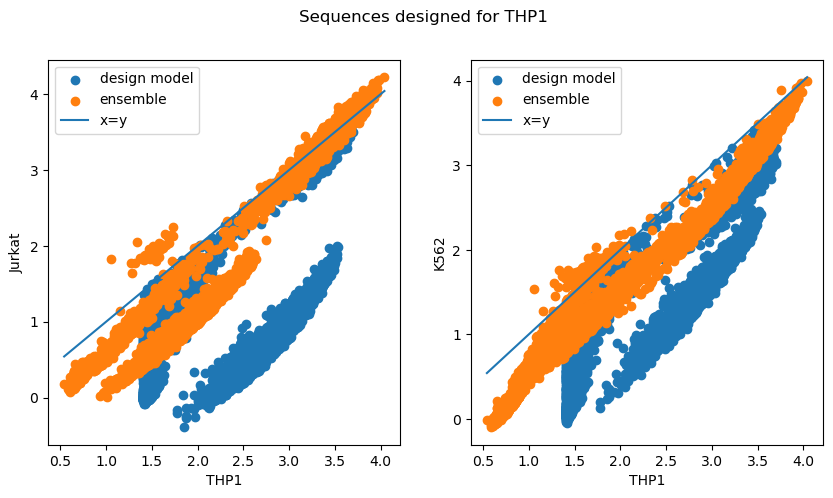

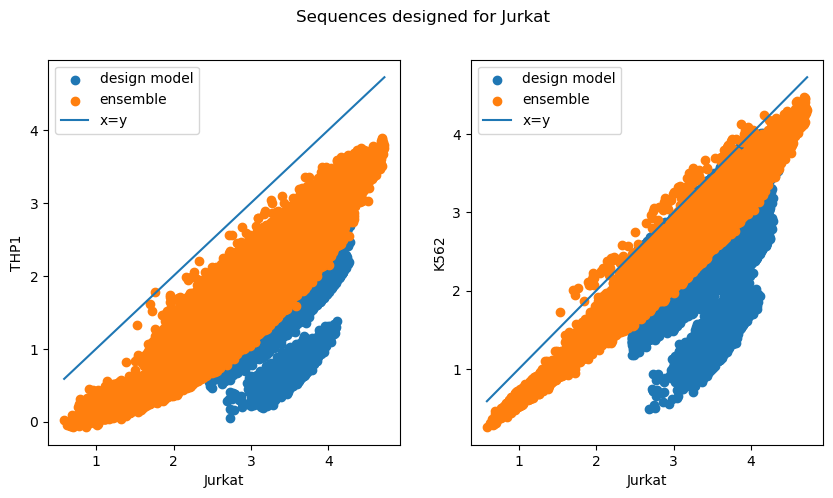

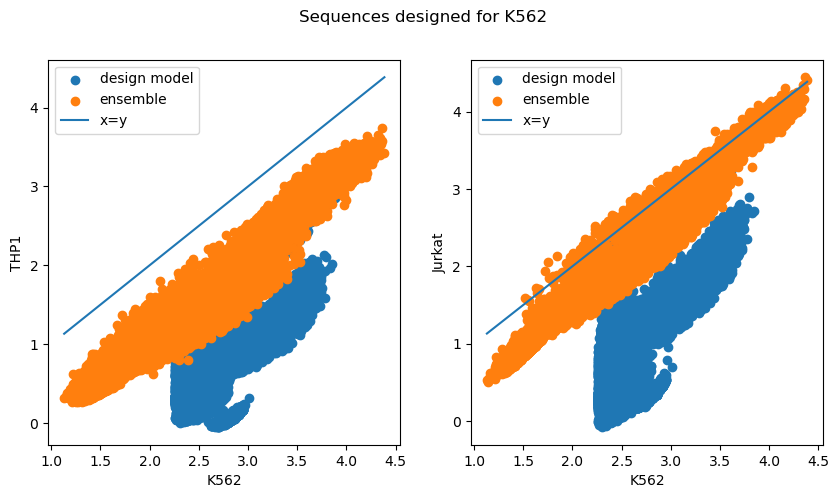

In [7]:
for i, cell1 in enumerate(cells):
    subset = df[df["designed_for"] == cell1]
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    c = 0
    for j, cell2 in enumerate(cells):
        if i == j:
            continue
        ax[c].scatter(subset[cell1], subset[cell2], label="design model")
        ax[c].scatter(subset["ensemble_mean_pred_" + cell1], subset["ensemble_mean_pred_" + cell2], label="ensemble")
        ax[c].plot(np.linspace(subset["ensemble_mean_pred_" + cell1].min(), 
                               subset["ensemble_mean_pred_" + cell1].max(), 10), 
                   np.linspace(subset["ensemble_mean_pred_" + cell1].min(), 
                               subset["ensemble_mean_pred_" + cell1].max(), 10), label="x=y")
        ax[c].set_xlabel(cell1)
        ax[c].set_ylabel(cell2)
        ax[c].legend()
        
        c += 1
    plt.suptitle(f"Sequences designed for {cell1}")
    plt.show()

THP1_using_coms_0.0003_THP1_weight_1.5.pkl_div_coef_1.0_ent_coef_1.0_bent_coef_5.0
(1024, 12)


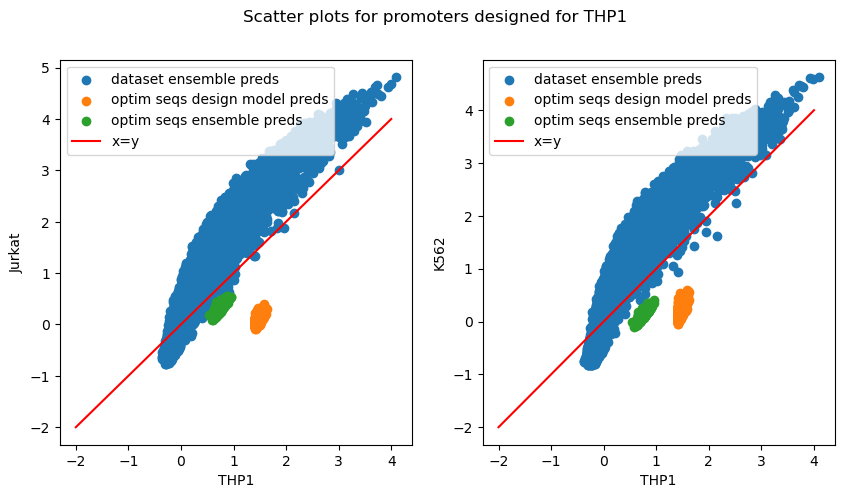

THP1_using_coms_0.0003_THP1_weight_1.5.pkl_div_coef_5.0_ent_coef_1.0_bent_coef_5.0
(1237, 12)


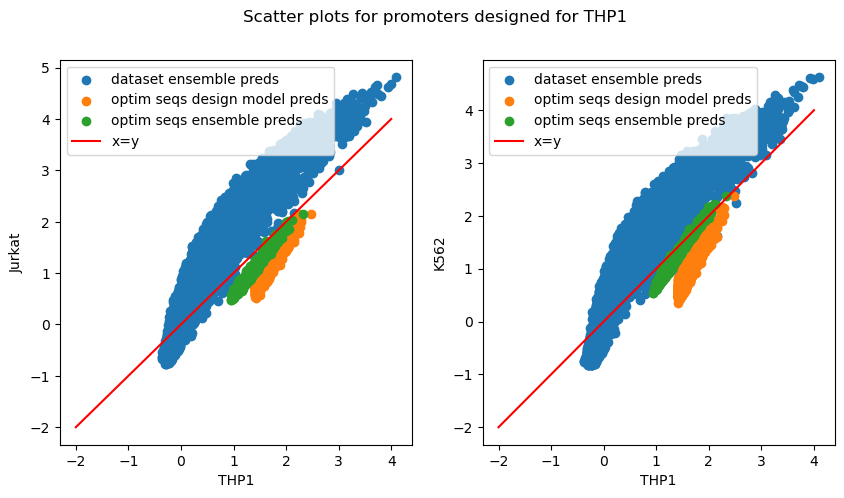

THP1_using_coms_0.0003_THP1_weight_1.5.pkl_div_coef_10.0_ent_coef_1.0_bent_coef_10.0
(44, 12)


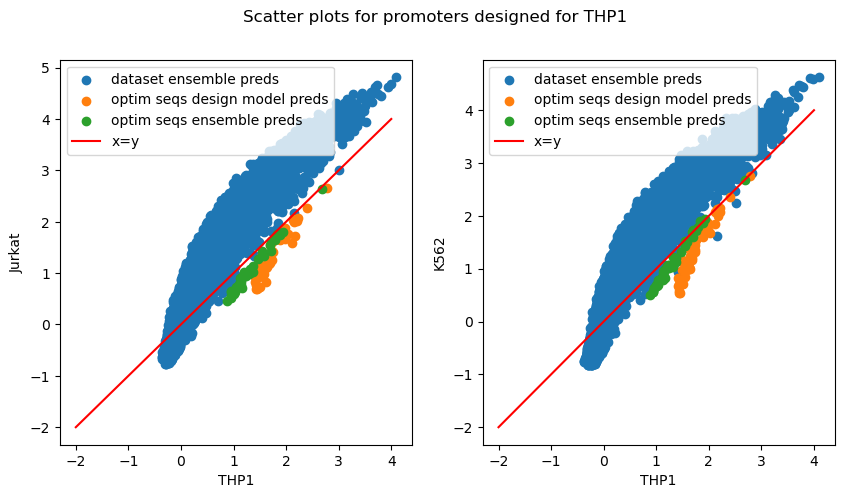

Jurkat_using_coms_0.0003_THP1_weight_1.5.pkl_div_coef_1.0_ent_coef_1.0_bent_coef_5.0
(5000, 12)


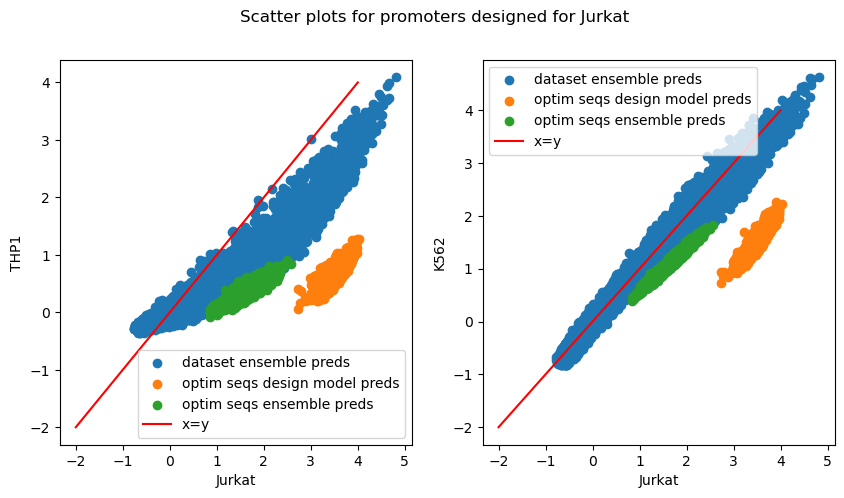

Jurkat_using_coms_0.0003_THP1_weight_1.5.pkl_div_coef_5.0_ent_coef_1.0_bent_coef_5.0
(3063, 12)


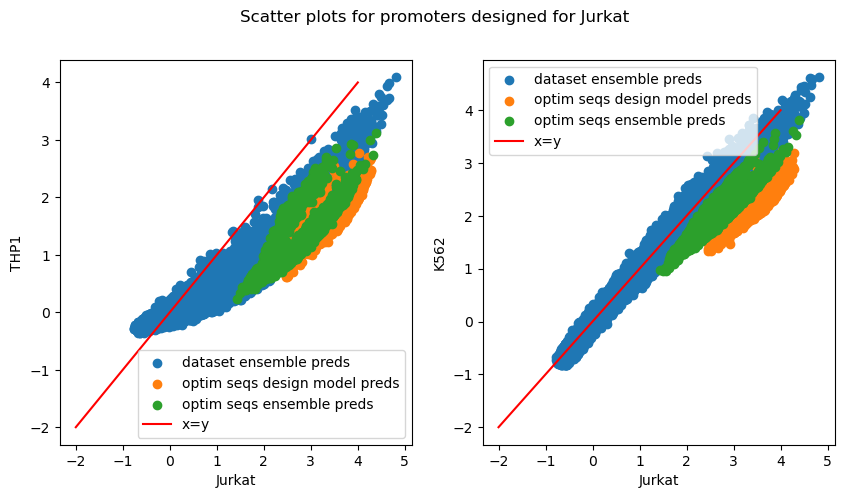

Jurkat_using_coms_0.0003_THP1_weight_1.5.pkl_div_coef_10.0_ent_coef_1.0_bent_coef_10.0
(3244, 12)


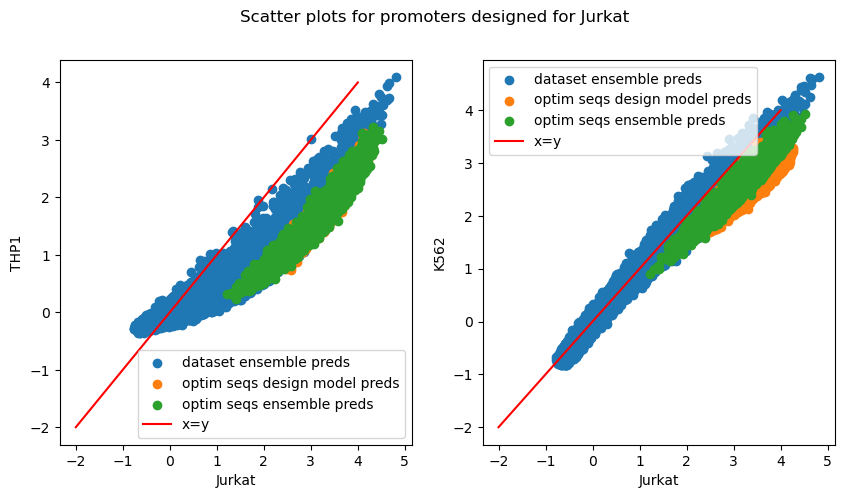

K562_using_coms_0.0003_THP1_weight_1.5.pkl_div_coef_1.0_ent_coef_1.0_bent_coef_5.0
(4983, 12)


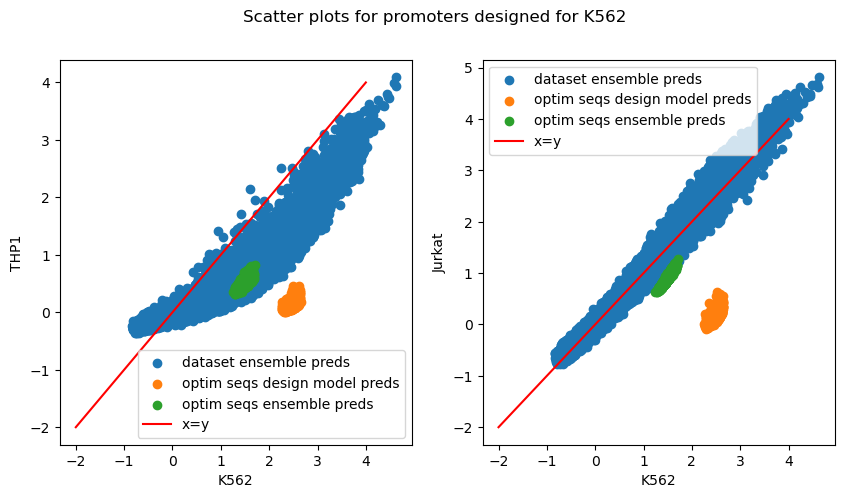

K562_using_coms_0.0003_THP1_weight_1.5.pkl_div_coef_5.0_ent_coef_1.0_bent_coef_5.0
(3179, 12)


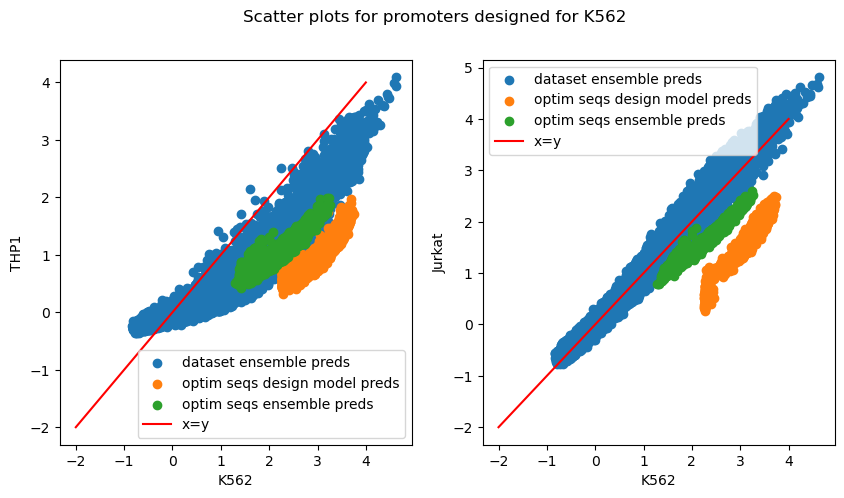

K562_using_coms_0.0003_THP1_weight_1.5.pkl_div_coef_10.0_ent_coef_1.0_bent_coef_10.0
(14, 12)


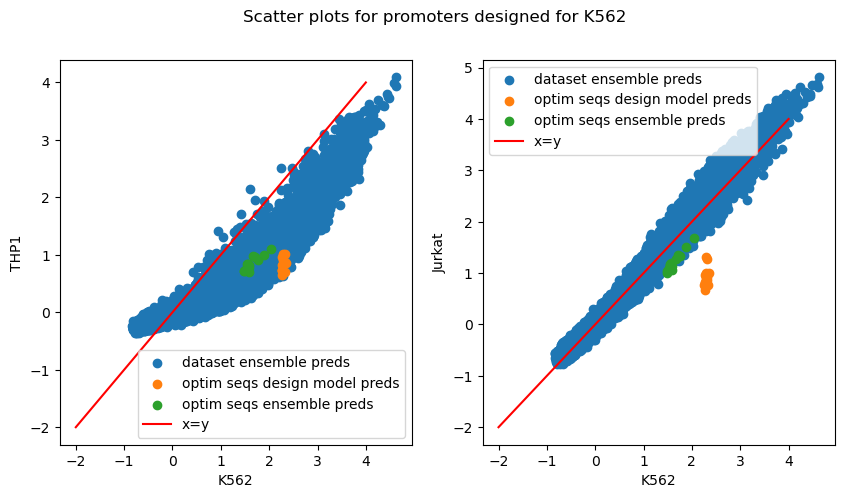

THP1_using_coms_0.001_THP1_weight_1.5.pkl_div_coef_1.0_ent_coef_1.0_bent_coef_5.0
OPTIMIZATION FAILED
THP1_using_coms_0.001_THP1_weight_1.5.pkl_div_coef_5.0_ent_coef_1.0_bent_coef_5.0
(16, 12)


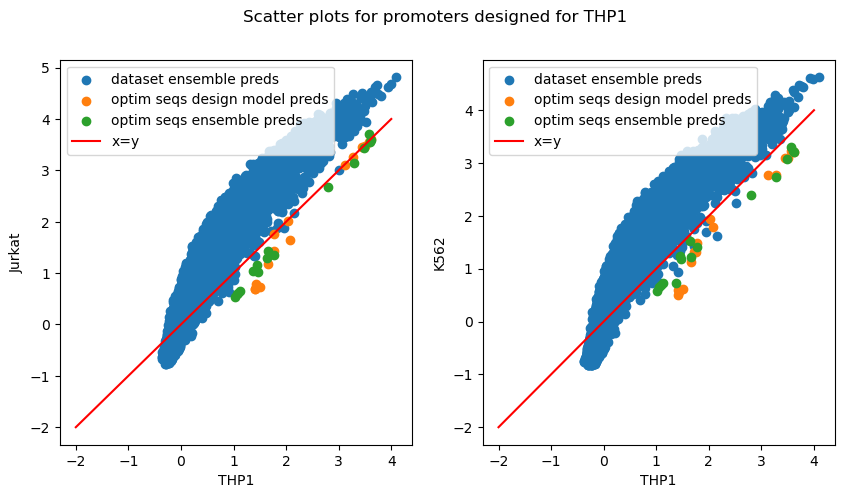

THP1_using_coms_0.001_THP1_weight_1.5.pkl_div_coef_10.0_ent_coef_1.0_bent_coef_10.0
(36, 12)


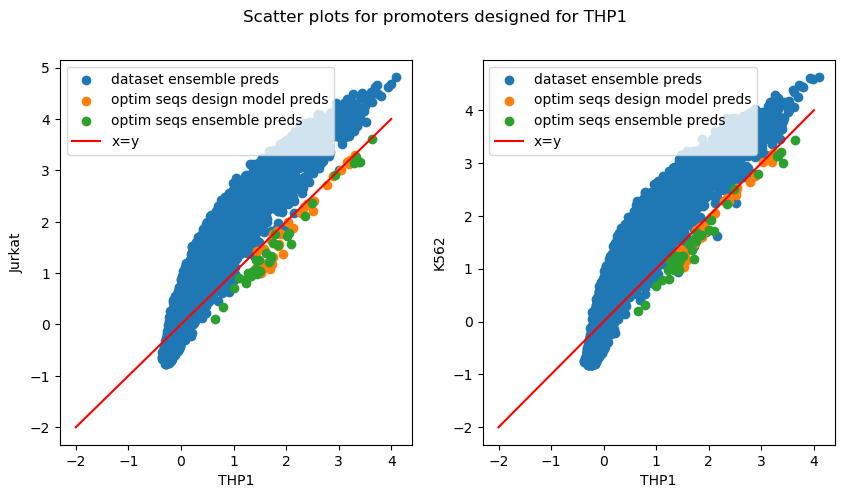

Jurkat_using_coms_0.001_THP1_weight_1.5.pkl_div_coef_1.0_ent_coef_1.0_bent_coef_5.0
(5000, 12)


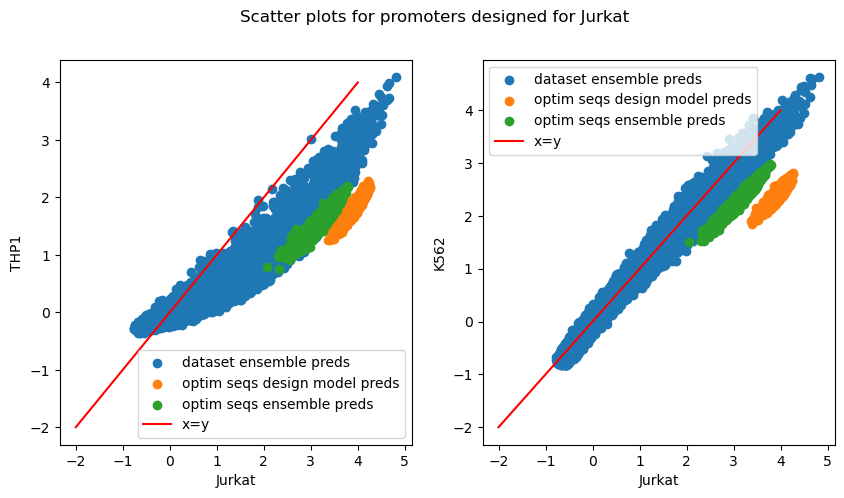

Jurkat_using_coms_0.001_THP1_weight_1.5.pkl_div_coef_5.0_ent_coef_1.0_bent_coef_5.0
(3747, 12)


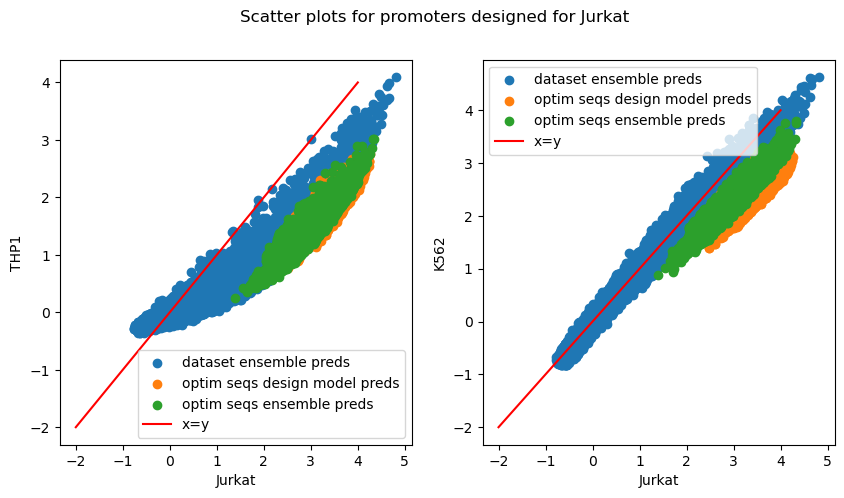

Jurkat_using_coms_0.001_THP1_weight_1.5.pkl_div_coef_10.0_ent_coef_1.0_bent_coef_10.0
(3220, 12)


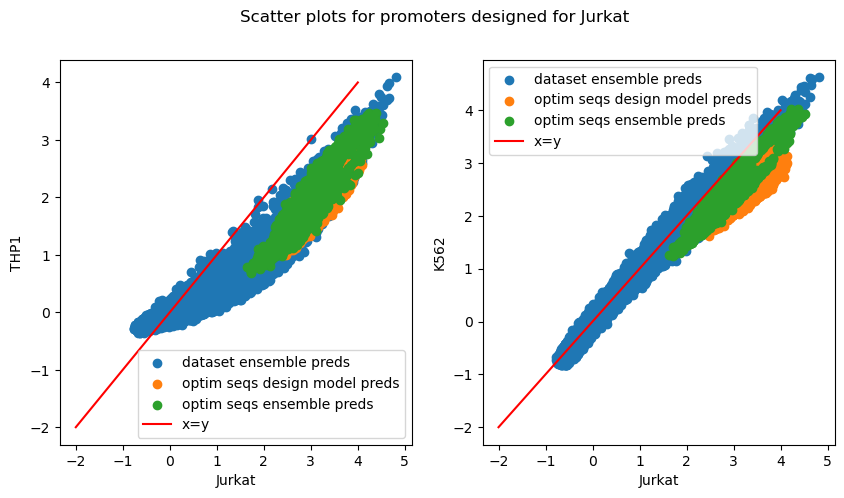

K562_using_coms_0.001_THP1_weight_1.5.pkl_div_coef_1.0_ent_coef_1.0_bent_coef_5.0
(4985, 12)


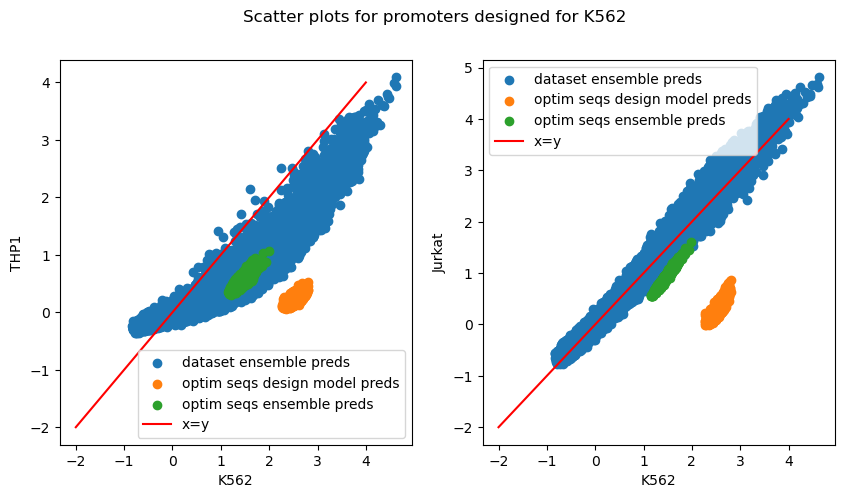

K562_using_coms_0.001_THP1_weight_1.5.pkl_div_coef_5.0_ent_coef_1.0_bent_coef_5.0
(3621, 12)


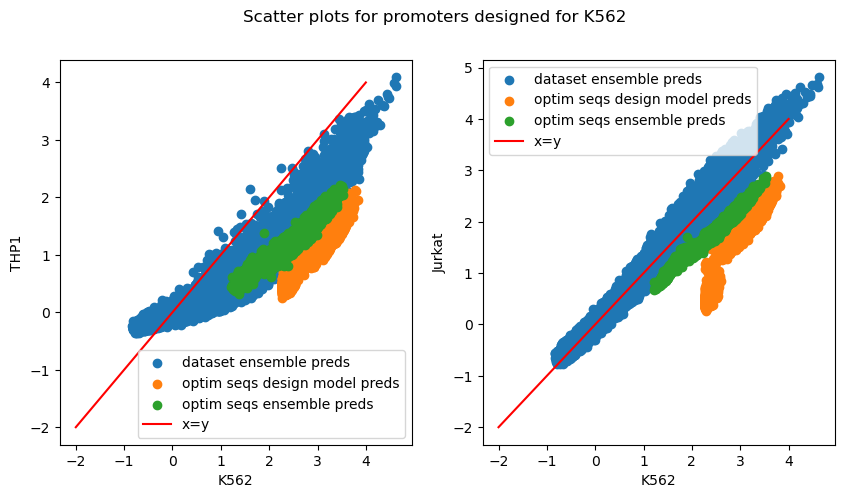

K562_using_coms_0.001_THP1_weight_1.5.pkl_div_coef_10.0_ent_coef_1.0_bent_coef_10.0
OPTIMIZATION FAILED
THP1_using_coms_0.003_THP1_weight_1.5.pkl_div_coef_1.0_ent_coef_1.0_bent_coef_5.0
OPTIMIZATION FAILED
THP1_using_coms_0.003_THP1_weight_1.5.pkl_div_coef_5.0_ent_coef_1.0_bent_coef_5.0
OPTIMIZATION FAILED
THP1_using_coms_0.003_THP1_weight_1.5.pkl_div_coef_10.0_ent_coef_1.0_bent_coef_10.0
OPTIMIZATION FAILED
Jurkat_using_coms_0.003_THP1_weight_1.5.pkl_div_coef_1.0_ent_coef_1.0_bent_coef_5.0
(5000, 12)


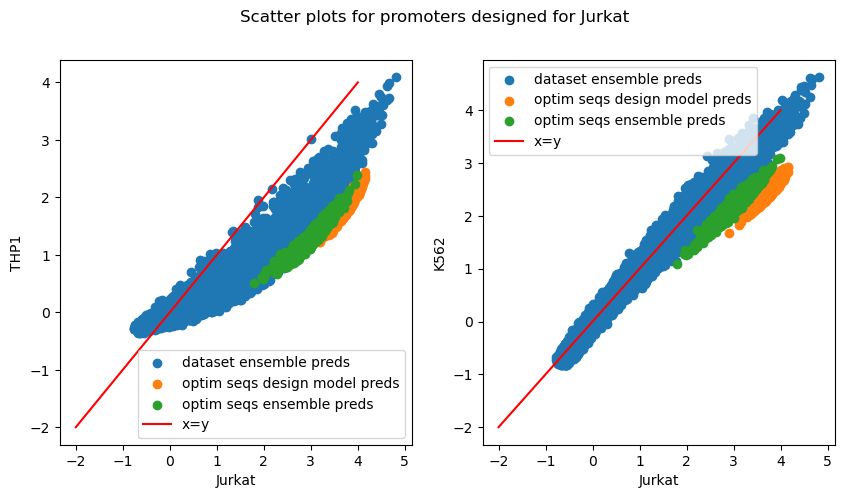

Jurkat_using_coms_0.003_THP1_weight_1.5.pkl_div_coef_5.0_ent_coef_1.0_bent_coef_5.0
(3433, 12)


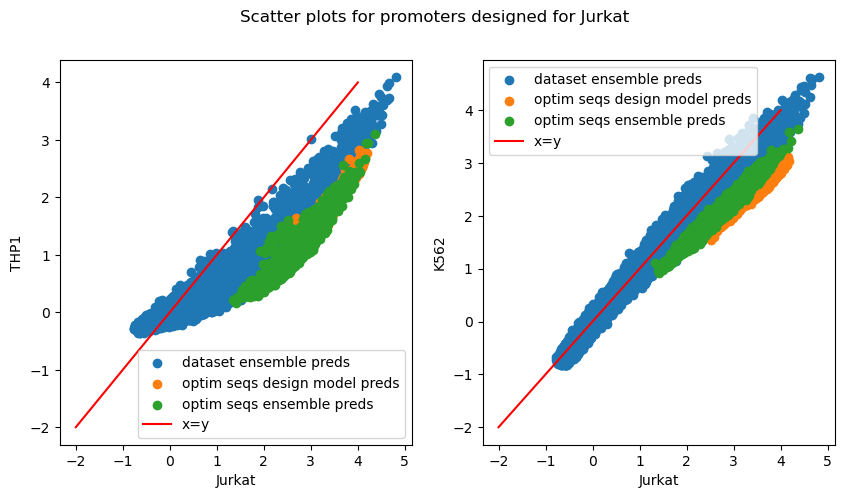

Jurkat_using_coms_0.003_THP1_weight_1.5.pkl_div_coef_10.0_ent_coef_1.0_bent_coef_10.0
(2430, 12)


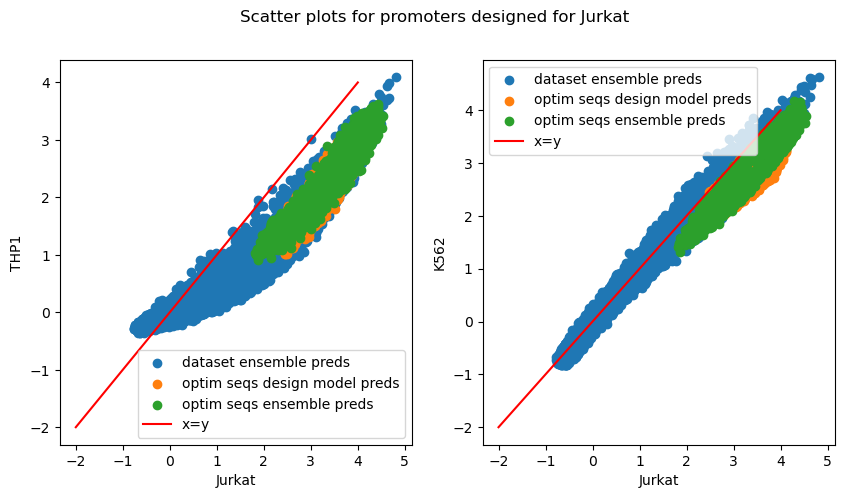

K562_using_coms_0.003_THP1_weight_1.5.pkl_div_coef_1.0_ent_coef_1.0_bent_coef_5.0
(4983, 12)


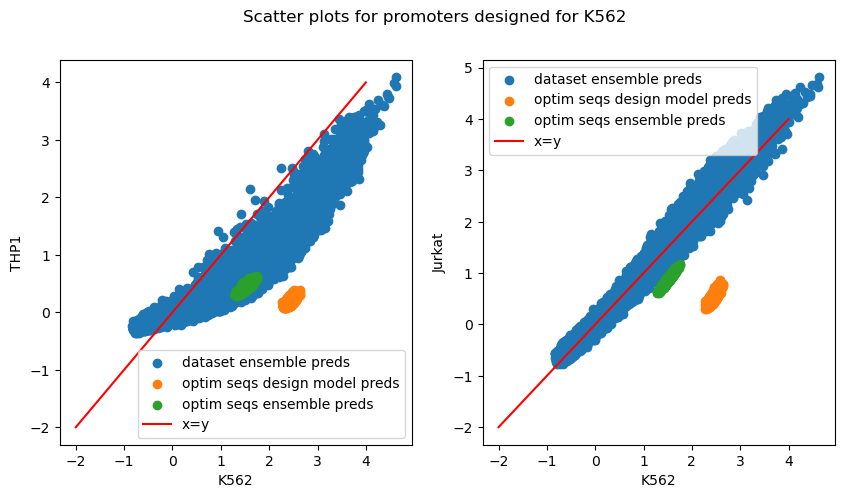

K562_using_coms_0.003_THP1_weight_1.5.pkl_div_coef_5.0_ent_coef_1.0_bent_coef_5.0
(2, 12)


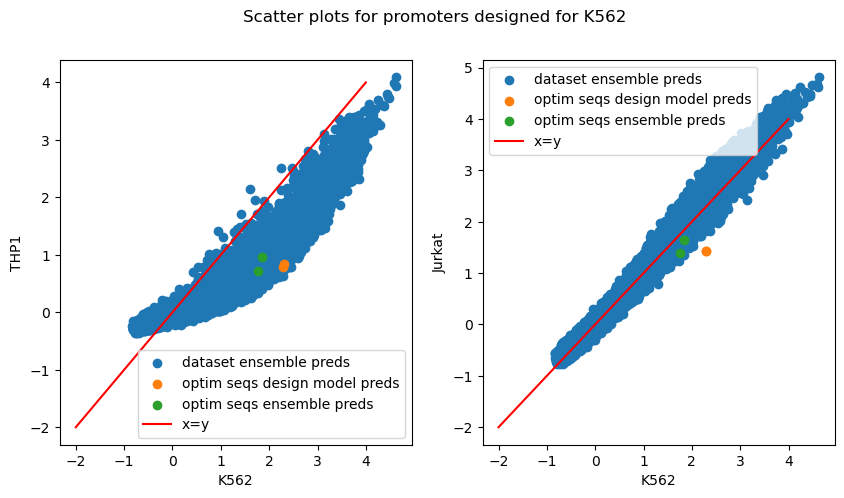

K562_using_coms_0.003_THP1_weight_1.5.pkl_div_coef_10.0_ent_coef_1.0_bent_coef_10.0
OPTIMIZATION FAILED
THP1_using_coms_0.01_THP1_weight_1.5.pkl_div_coef_1.0_ent_coef_1.0_bent_coef_5.0
OPTIMIZATION FAILED
THP1_using_coms_0.01_THP1_weight_1.5.pkl_div_coef_5.0_ent_coef_1.0_bent_coef_5.0
(45, 12)


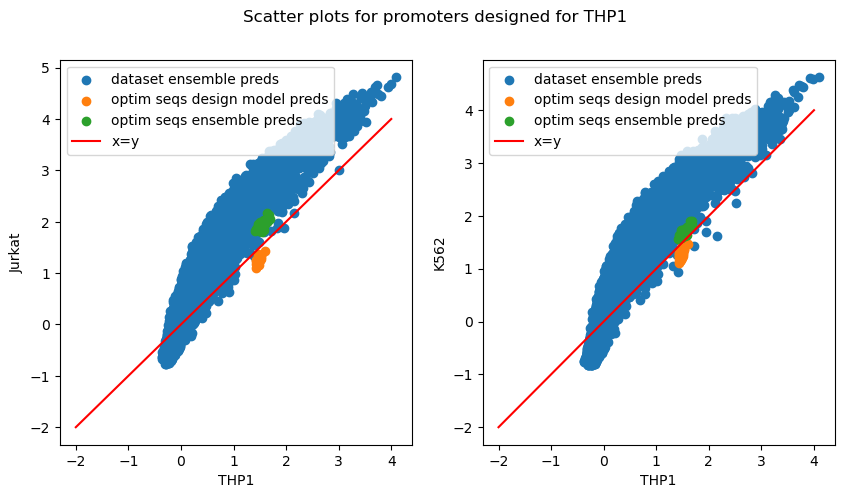

THP1_using_coms_0.01_THP1_weight_1.5.pkl_div_coef_10.0_ent_coef_1.0_bent_coef_10.0
(12, 12)


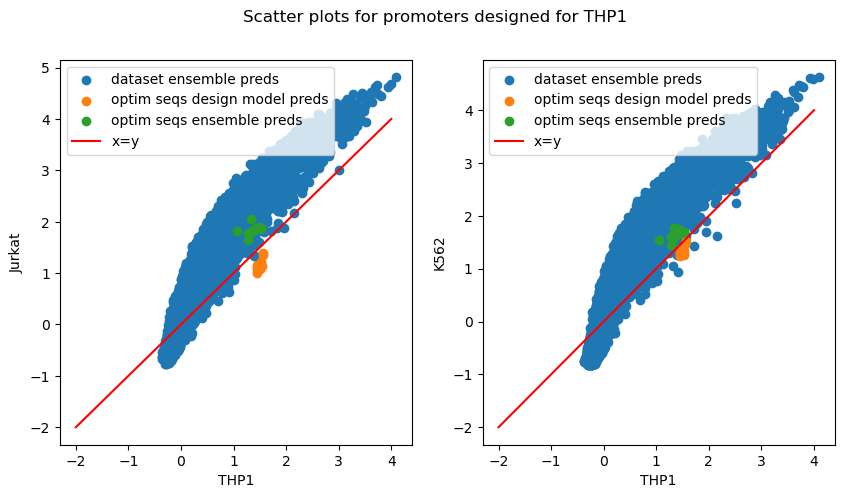

Jurkat_using_coms_0.01_THP1_weight_1.5.pkl_div_coef_1.0_ent_coef_1.0_bent_coef_5.0
(5000, 12)


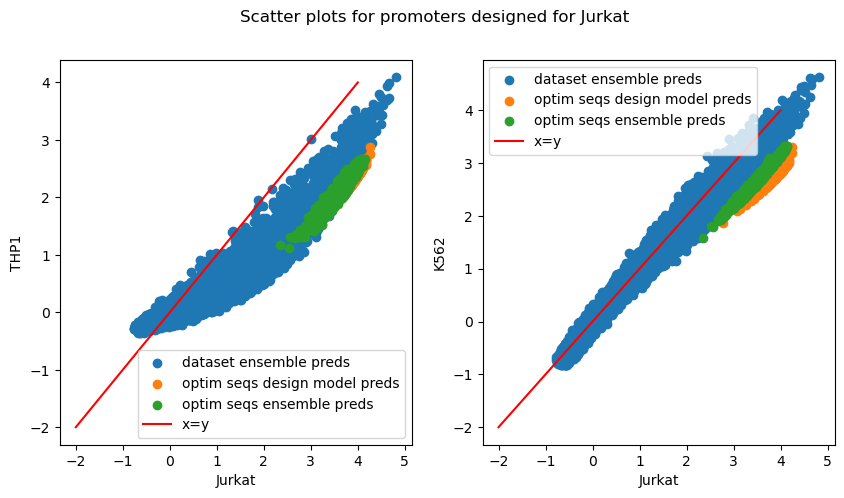

Jurkat_using_coms_0.01_THP1_weight_1.5.pkl_div_coef_5.0_ent_coef_1.0_bent_coef_5.0
(4825, 12)


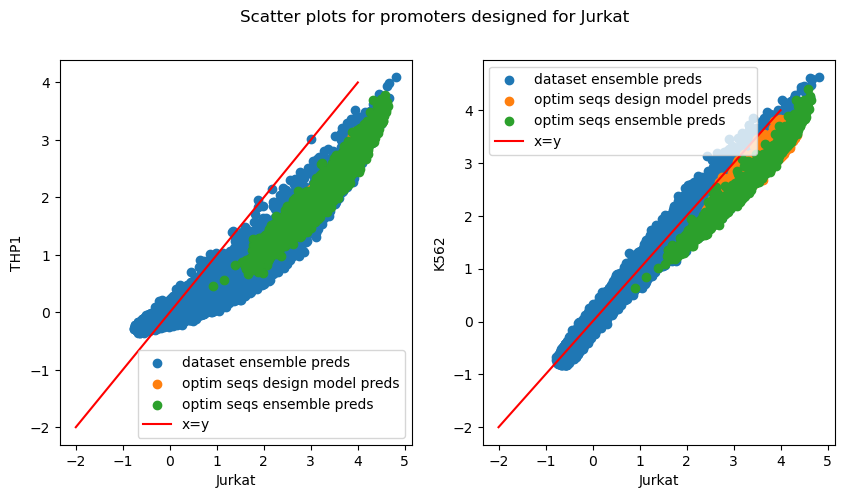

Jurkat_using_coms_0.01_THP1_weight_1.5.pkl_div_coef_10.0_ent_coef_1.0_bent_coef_10.0
(2739, 12)


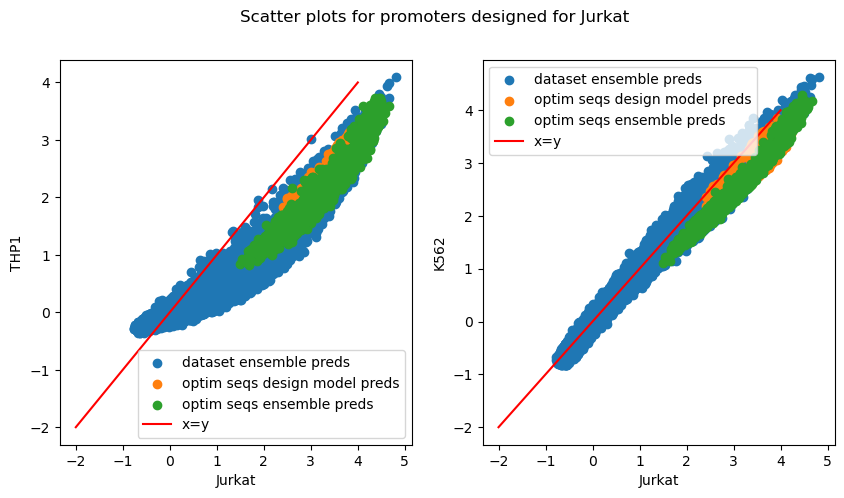

K562_using_coms_0.01_THP1_weight_1.5.pkl_div_coef_1.0_ent_coef_1.0_bent_coef_5.0
(906, 12)


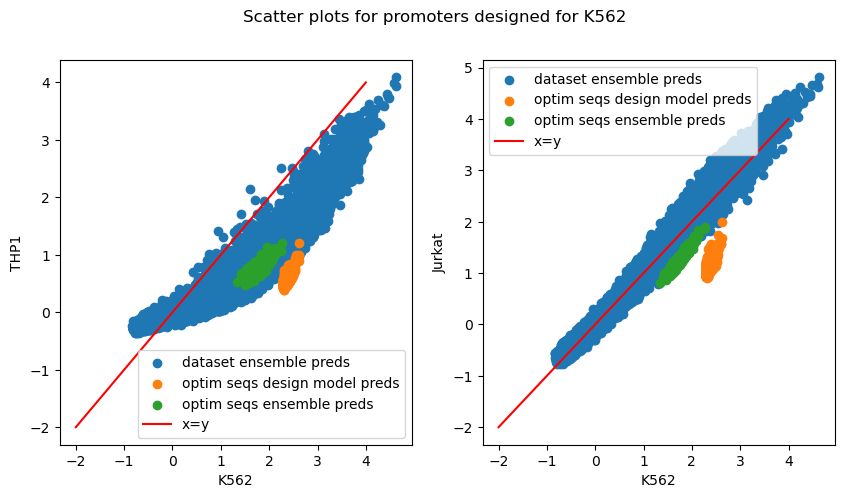

K562_using_coms_0.01_THP1_weight_1.5.pkl_div_coef_5.0_ent_coef_1.0_bent_coef_5.0
(1200, 12)


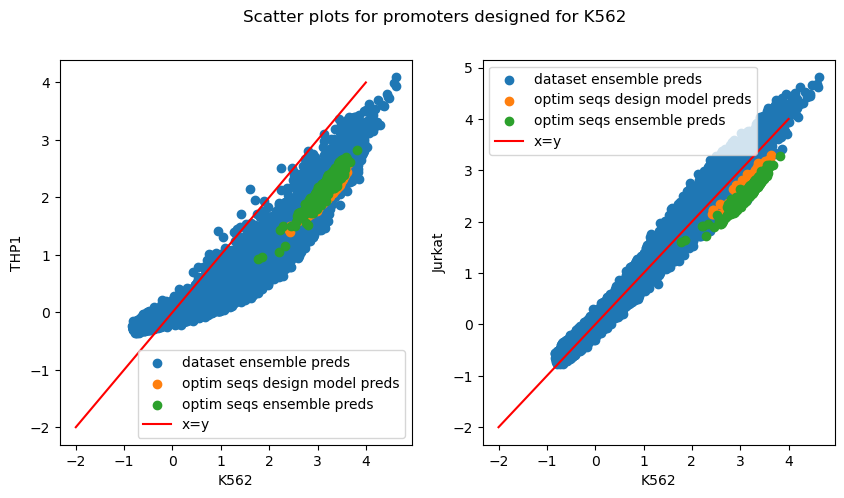

K562_using_coms_0.01_THP1_weight_1.5.pkl_div_coef_10.0_ent_coef_1.0_bent_coef_10.0
(1567, 12)


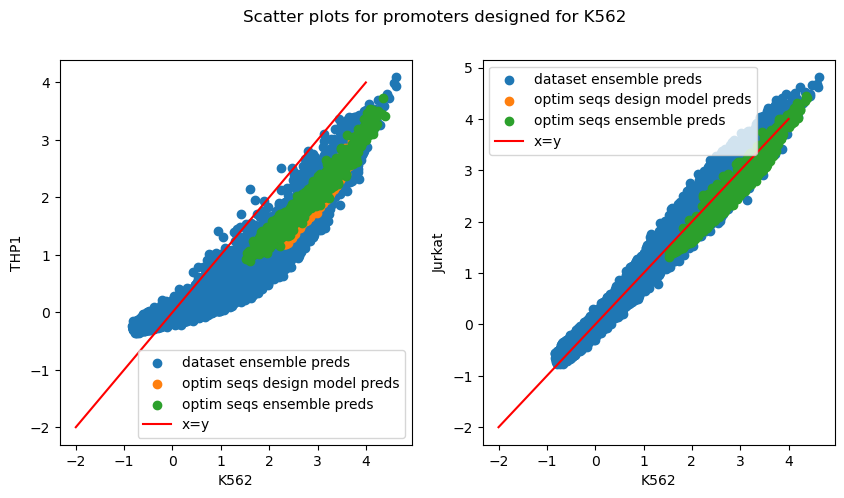

THP1_using_coms_0.03_THP1_weight_1.5.pkl_div_coef_1.0_ent_coef_1.0_bent_coef_5.0
OPTIMIZATION FAILED
THP1_using_coms_0.03_THP1_weight_1.5.pkl_div_coef_5.0_ent_coef_1.0_bent_coef_5.0
(3, 12)


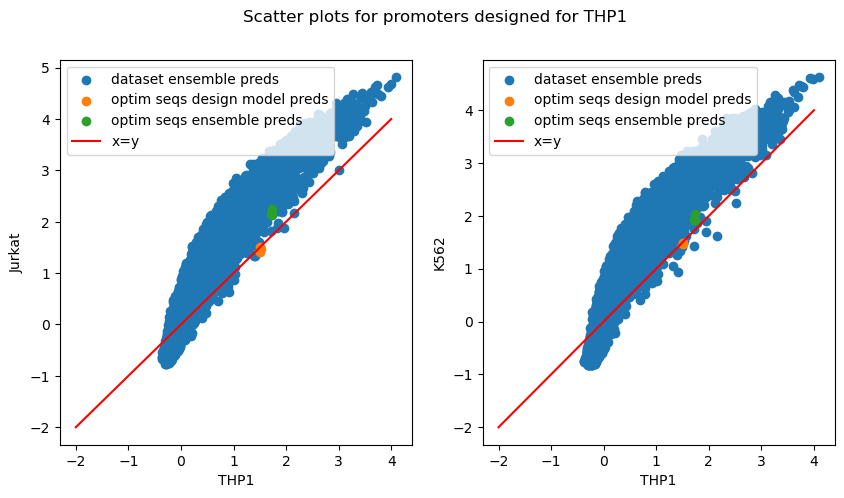

THP1_using_coms_0.03_THP1_weight_1.5.pkl_div_coef_10.0_ent_coef_1.0_bent_coef_10.0
OPTIMIZATION FAILED
Jurkat_using_coms_0.03_THP1_weight_1.5.pkl_div_coef_1.0_ent_coef_1.0_bent_coef_5.0
(4999, 12)


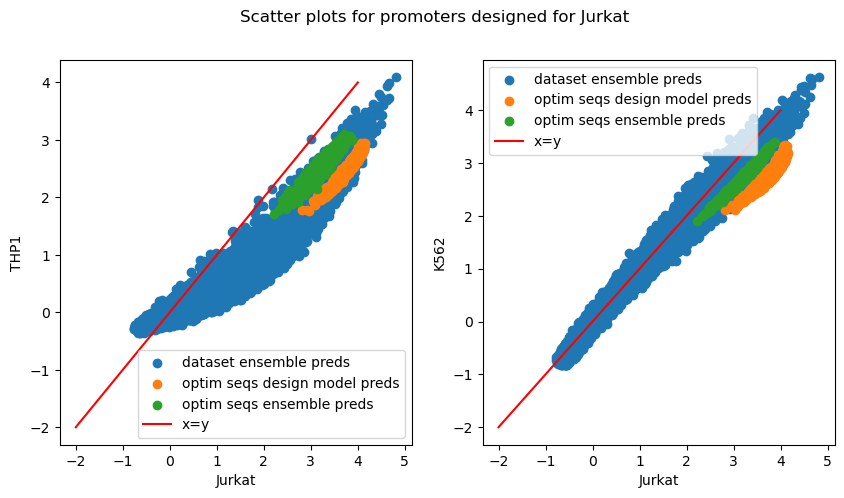

Jurkat_using_coms_0.03_THP1_weight_1.5.pkl_div_coef_5.0_ent_coef_1.0_bent_coef_5.0
(4636, 12)


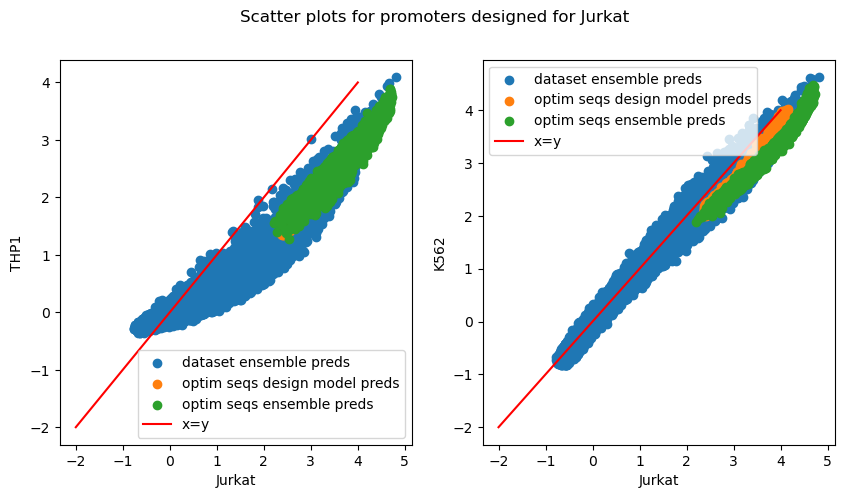

Jurkat_using_coms_0.03_THP1_weight_1.5.pkl_div_coef_10.0_ent_coef_1.0_bent_coef_10.0
(2477, 12)


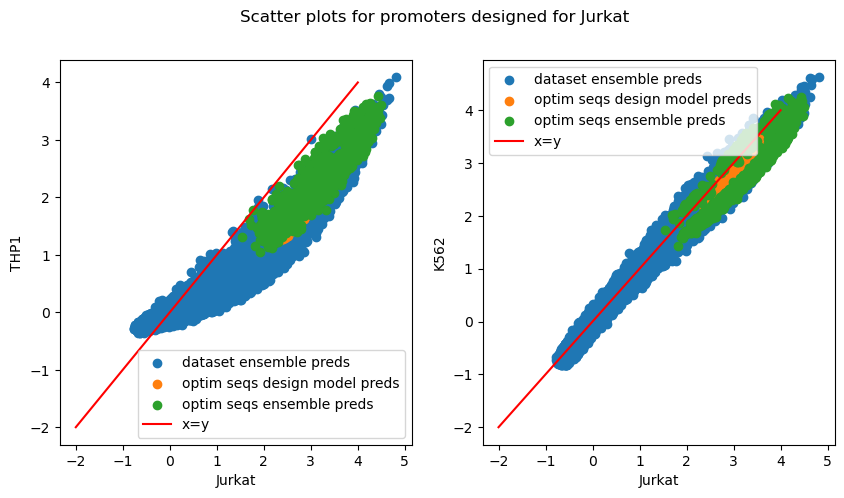

K562_using_coms_0.03_THP1_weight_1.5.pkl_div_coef_1.0_ent_coef_1.0_bent_coef_5.0
OPTIMIZATION FAILED
K562_using_coms_0.03_THP1_weight_1.5.pkl_div_coef_5.0_ent_coef_1.0_bent_coef_5.0
(2667, 12)


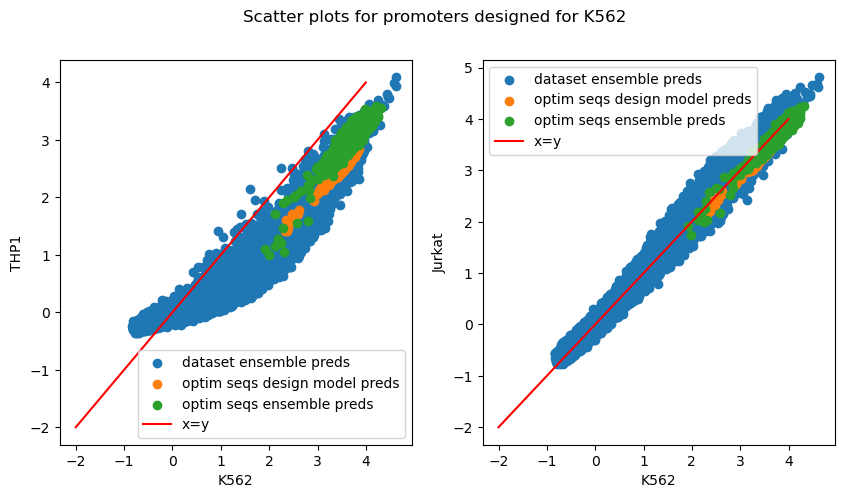

K562_using_coms_0.03_THP1_weight_1.5.pkl_div_coef_10.0_ent_coef_1.0_bent_coef_10.0
(1253, 12)


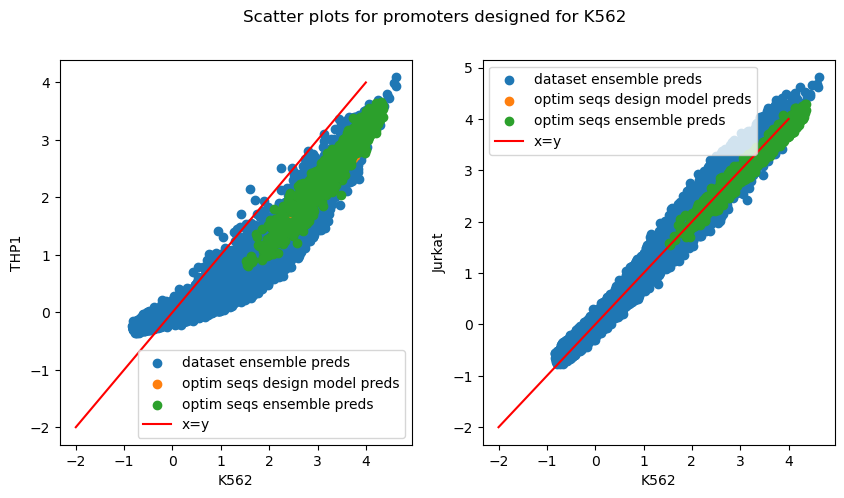

THP1_using_coms_0.0_THP1_weight_1.5.pkl_div_coef_1.0_ent_coef_1.0_bent_coef_5.0
(5000, 12)


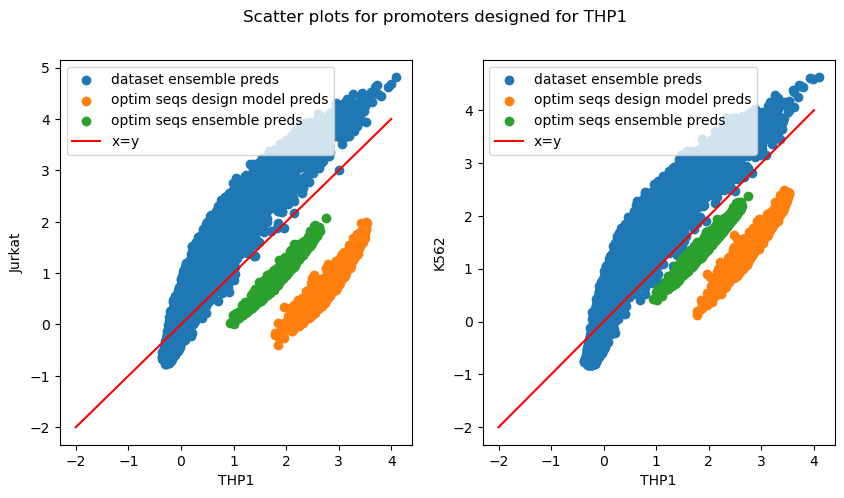

THP1_using_coms_0.0_THP1_weight_1.5.pkl_div_coef_5.0_ent_coef_1.0_bent_coef_5.0
(2078, 12)


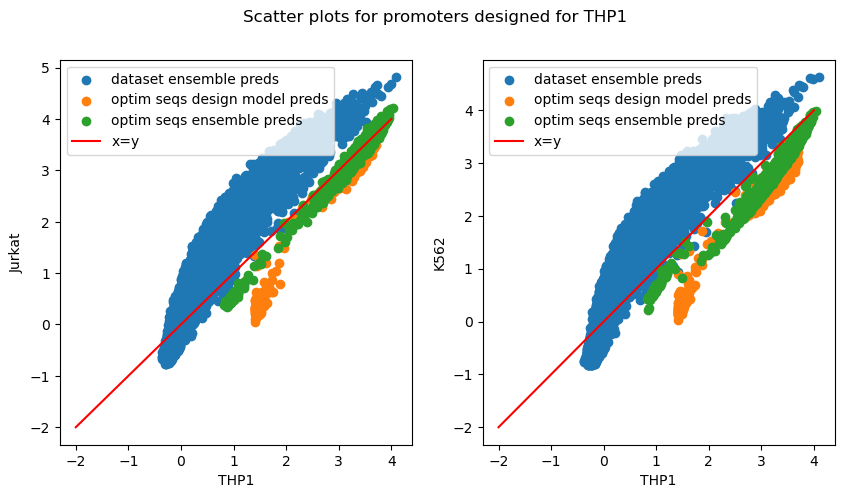

THP1_using_coms_0.0_THP1_weight_1.5.pkl_div_coef_10.0_ent_coef_1.0_bent_coef_10.0
(242, 12)


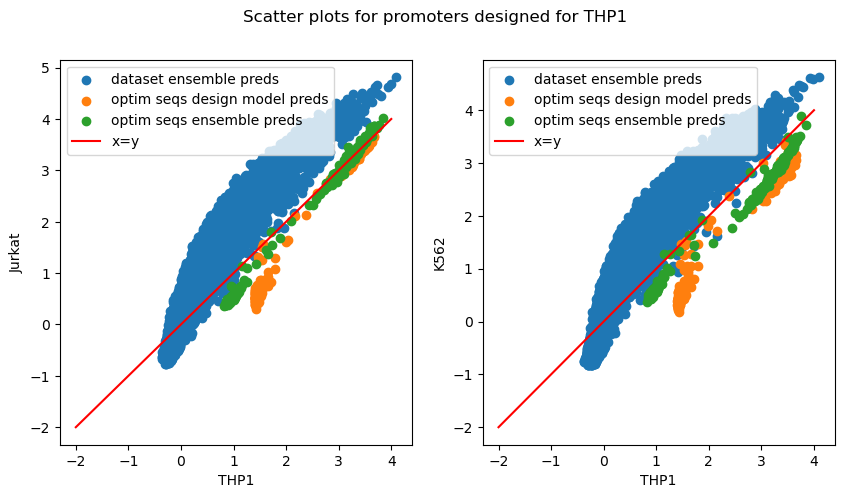

Jurkat_using_coms_0.0_THP1_weight_1.5.pkl_div_coef_1.0_ent_coef_1.0_bent_coef_5.0
(5000, 12)


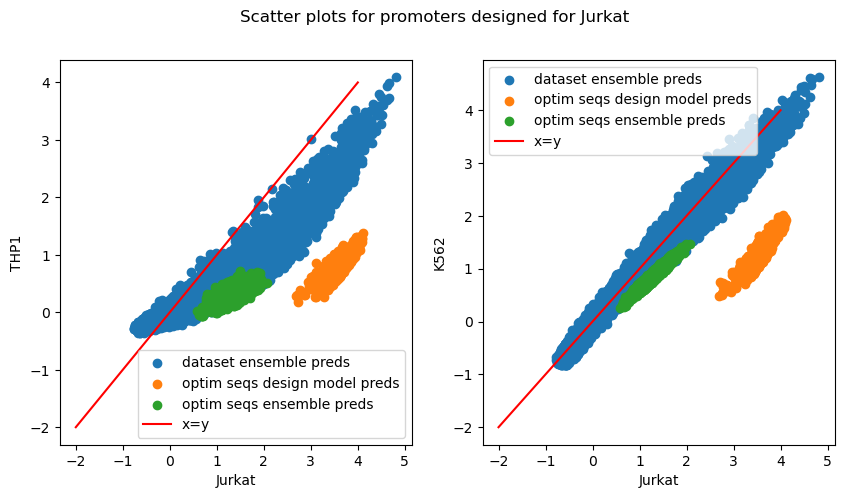

Jurkat_using_coms_0.0_THP1_weight_1.5.pkl_div_coef_5.0_ent_coef_1.0_bent_coef_5.0
(2928, 12)


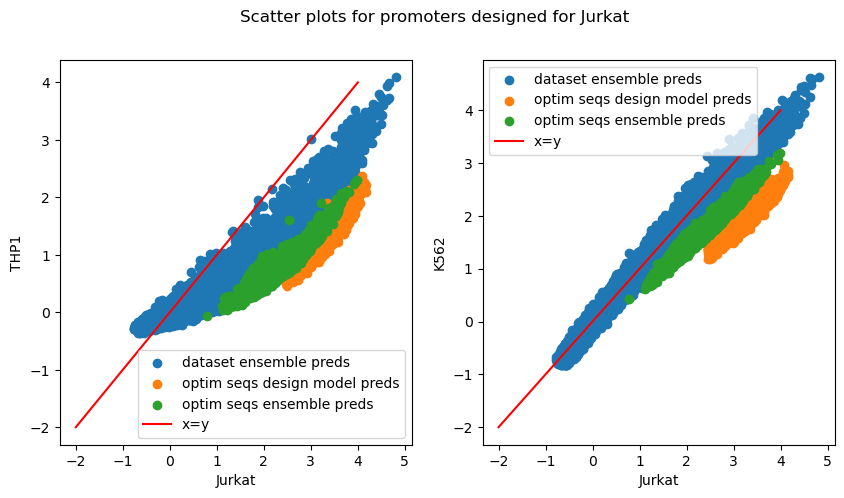

Jurkat_using_coms_0.0_THP1_weight_1.5.pkl_div_coef_10.0_ent_coef_1.0_bent_coef_10.0
(2357, 12)


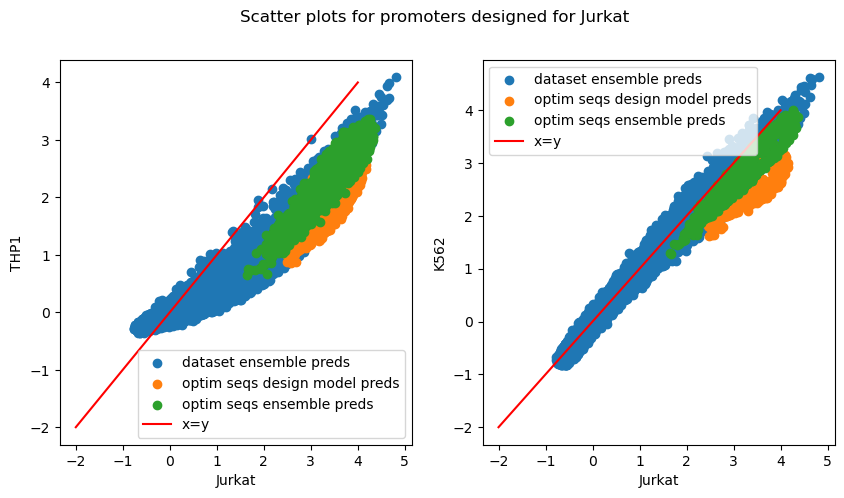

K562_using_coms_0.0_THP1_weight_1.5.pkl_div_coef_1.0_ent_coef_1.0_bent_coef_5.0
(5000, 12)


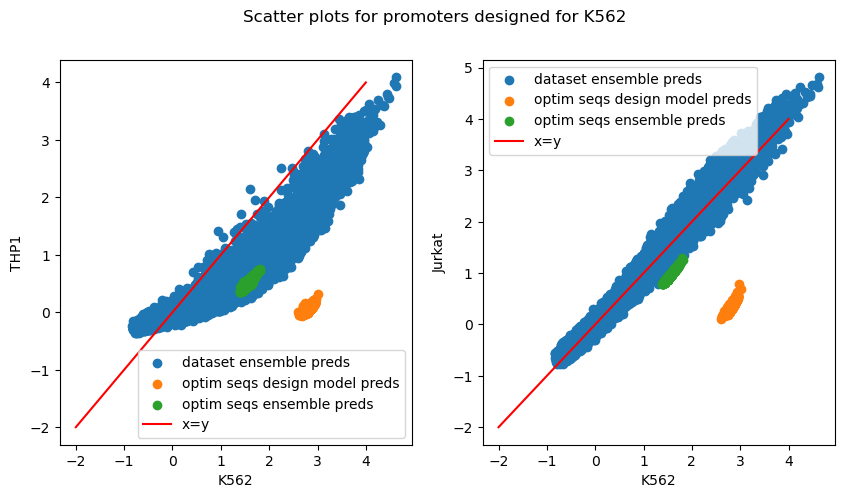

K562_using_coms_0.0_THP1_weight_1.5.pkl_div_coef_5.0_ent_coef_1.0_bent_coef_5.0
(4253, 12)


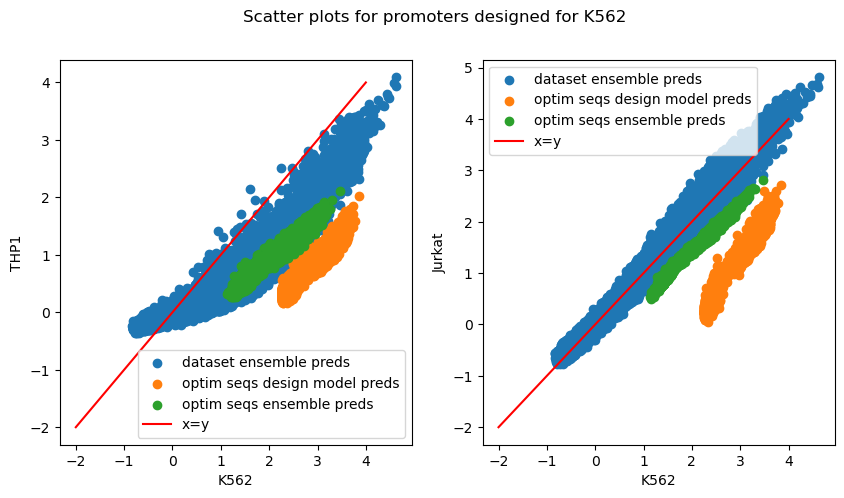

K562_using_coms_0.0_THP1_weight_1.5.pkl_div_coef_10.0_ent_coef_1.0_bent_coef_10.0
(55, 12)


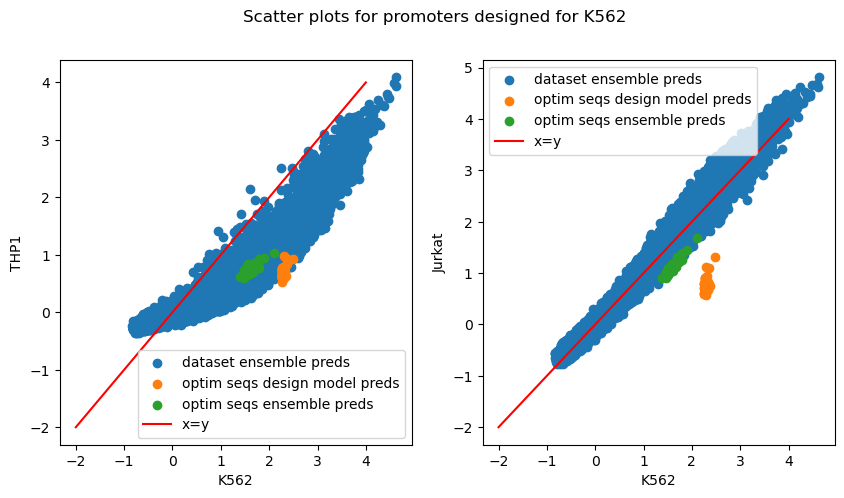

In [8]:
for model in sorted(os.listdir(os.path.join(jax_data_dir, "trained_predictors_final"))):
    for diff_exp_cell_ind, cell in enumerate(["THP1", "Jurkat", "K562"]):
        for config in all_configs:
            diversity_loss_coef = config["diversity_loss_coef"]
            entropy_loss_coef = config["entropy_loss_coef"]
            base_entropy_loss_coef = config["base_entropy_loss_coef"]

            experiment_id = f"{cell}_using_{model}_div_coef_{diversity_loss_coef}_ent_coef_{entropy_loss_coef}_bent_coef_{base_entropy_loss_coef}"
            
            print(experiment_id)
            
            # filter out sequences with low predicted expression when compared to the test set predictions
            test_set_preds = np.load(os.path.join(saved_models_dir, experiment_id, "all_yhat.npy"), allow_pickle=True)[()]
            
            subset = df[(df["designed_for"] == cell) & 
                           (df["design_model"] == model) & 
                           (df["diversity_loss_coef"] == diversity_loss_coef) & 
                           (df["entropy_loss_coef"] == entropy_loss_coef) & 
                           (df["base_entropy_loss_coef"] == base_entropy_loss_coef)].reset_index(drop=True)
            if len(subset) == 0:
                print("OPTIMIZATION FAILED")
                continue
            
            print(subset.shape)
            
            other_cells = [c for c in ["THP1", "Jurkat", "K562"] if c != cell]

            fig, ax = plt.subplots(1, 2, figsize=(10, 5))
            for j, other_cell in enumerate(other_cells):
                ax[j].scatter(dataset_ensemble_preds["ensemble_mean_" + cell], dataset_ensemble_preds["ensemble_mean_" + other_cell], label="dataset ensemble preds")
                ax[j].scatter(subset[cell], subset[other_cell], label="optim seqs design model preds")
                ax[j].scatter(subset["ensemble_mean_pred_" + cell], subset["ensemble_mean_pred_" + other_cell], label="optim seqs ensemble preds")
                ax[j].plot(np.linspace(-2, 4, 10), np.linspace(-2, 4, 10), color="r", label="x=y")
                ax[j].set_xlabel(cell)
                ax[j].set_ylabel(other_cell)
                ax[j].legend()
            fig.suptitle(f"Scatter plots for promoters designed for {cell}")
            plt.show()